# Organic Product Analysis

***

## Clean Data

In [193]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [194]:
df = pd.read_csv('organics.csv')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [195]:
df.rename(columns={'DemAffl':'Wealth', 'DemAge':'Age', 'DemCluster':'ResidentType','DemClusterGroup':'NeighborhoodGroup', 'DemGender':'Gender', 'DemReg':'Region', 'DemTVReg':'TVRegion', 'PromClass':'LoyaltyStatus', 'PromSpend':'SpendYTD', 'PromTime':'MemberLength'}, inplace=True)
df.drop(columns=['ID','ResidentType','NeighborhoodGroup'], inplace=True)
df

,Wealth,Age,Gender,Region,TVRegion,LoyaltyStatus,SpendYTD,MemberLength,TargetBuy,TargetAmt
0,10.0,76.0,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,F,South East,London,Silver,1500.00,5.0,0,0
22219,15.0,73.0,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,9.0,70.0,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,11.0,66.0,F,North,N West,Silver,5000.00,5.0,0,0


In [196]:
df['Gender'].fillna('U', inplace=True)
df.isna().sum()

Wealth           1085
Age              1508
Gender              0
Region            465
TVRegion          465
LoyaltyStatus       0
SpendYTD            0
MemberLength      281
TargetBuy           0
TargetAmt           0
dtype: int64

In [197]:
df.dropna(inplace=True)
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.shape

(19066, 10)

In [198]:
df_amt = df.copy()
df.drop(columns=['TargetAmt'], inplace=True)
df

,Wealth,Age,Gender,Region,TVRegion,LoyaltyStatus,SpendYTD,MemberLength,TargetBuy
0,10.0,76.0,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,F,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,F,South East,London,Silver,1500.00,5.0,0
22219,15.0,73.0,U,South East,S & S East,Gold,6053.06,12.0,0
22220,9.0,70.0,F,North,Yorkshire,Gold,6000.00,5.0,0
22221,11.0,66.0,F,North,N West,Silver,5000.00,5.0,0


***

## Exploratory Analysis

In [199]:
# Calculate the percentage of records where TargetBuy = 1 for each gender category
gender_target_buy = df[df['TargetBuy'] == 1].groupby('Gender').size() / df.groupby('Gender').size() * 100

# Display the result
print(gender_target_buy)

Gender
F    34.141433
M    16.515609
U     7.530696
dtype: float64


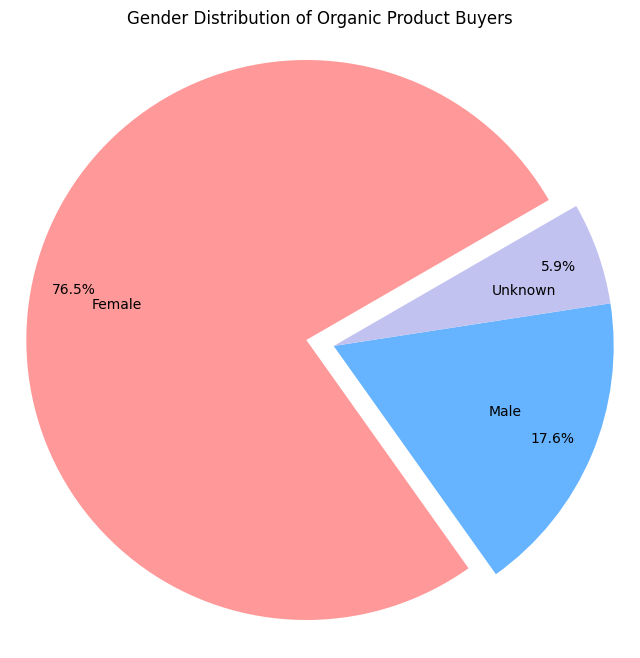

In [200]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Female', 'Male', 'Unknown']
sizes = [76.5, 17.6, 5.9]
colors = ['#ff9999', '#66b3ff', '#c2c2f0']  # Assign colors to categories
explode = (0.1, 0, 0)  # Highlight the 'Female' slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, colors=colors, explode=explode, pctdistance=0.85, labeldistance=0.6)
plt.title('Gender Distribution of Organic Product Buyers')
plt.axis('equal')  # Ensure the pie chart is a circle

plt.show()

In [201]:
# Calculate the percentage of records where TargetBuy = 1 for each LoyaltyStatus
loyalty_status_target_buy = df[df['TargetBuy'] == 1].groupby('LoyaltyStatus').size() / df.groupby('LoyaltyStatus').size() * 100
loyalty_status_target_buy = loyalty_status_target_buy.sort_values(ascending=True)

# Display the result
print('Percentage of Organic Buyers by:')
print(loyalty_status_target_buy)

Percentage of Organic Buyers by:
LoyaltyStatus
Platinum    14.439946
Gold        19.164981
Silver      24.405167
Tin         30.995843
dtype: float64


In [202]:
# Create a new column for age groups
df2 = df.copy()
df2 = df2[df2['Age'] >=20]
df2['AgeGroup'] = (df2['Age'] // 10) * 10

# Calculate the percentage of records where TargetBuy = 1 for each age group
age_group_target_buy = df2[df2['TargetBuy'] == 1].groupby('AgeGroup').size() / df2.groupby('AgeGroup').size() * 100

# Display the result
print('Percentage of Organic Buyers by:')
print(age_group_target_buy)

Percentage of Organic Buyers by:
AgeGroup
20.0    59.164733
30.0    59.518519
40.0    25.126476
50.0    14.937500
60.0    14.643769
70.0    15.245963
dtype: float64


In [203]:
# Filter the dataframe for age group 40 and above
df_40_plus = df[df['Age'] >= 40]

# Calculate the percentage of records where TargetBuy = 1 for age group 40 and above
age_group_40_plus_target_buy = df_40_plus[df_40_plus['TargetBuy'] == 1].shape[0] / df_40_plus.shape[0] * 100

# Display the result
print(f"Percentage of TargetBuy = 1 for age group 40 and above: {age_group_40_plus_target_buy:.2f}%")

Percentage of TargetBuy = 1 for age group 40 and above: 17.57%


In [204]:
# Create a new column for spend groups
df2 = df.copy()
df2['SpendGroup'] = pd.cut(df2['SpendYTD'], bins=np.arange(0, df2['SpendYTD'].max() + 5000, 5000))

# Calculate the percentage of records where TargetBuy = 1 for each spend group
spend_group_target_buy = df2[df2['TargetBuy'] == 1].groupby('SpendGroup').size() / df2.groupby('SpendGroup').size() * 100

# Display the result
print(spend_group_target_buy)

SpendGroup
(0.0, 5000.0]            27.234637
(5000.0, 10000.0]        19.901656
(10000.0, 15000.0]       17.854002
(15000.0, 20000.0]       16.055046
(20000.0, 25000.0]       13.827160
(25000.0, 30000.0]       15.887850
(30000.0, 35000.0]       14.864865
(35000.0, 40000.0]       11.111111
(40000.0, 45000.0]       17.857143
(45000.0, 50000.0]       19.354839
(50000.0, 55000.0]       13.333333
(55000.0, 60000.0]        0.000000
(60000.0, 65000.0]        0.000000
(65000.0, 70000.0]       20.000000
(70000.0, 75000.0]        0.000000
(75000.0, 80000.0]       50.000000
(80000.0, 85000.0]       50.000000
(85000.0, 90000.0]        0.000000
(90000.0, 95000.0]        0.000000
(95000.0, 100000.0]      33.333333
(100000.0, 105000.0]           NaN
(105000.0, 110000.0]           NaN
(110000.0, 115000.0]      0.000000
(115000.0, 120000.0]      0.000000
(120000.0, 125000.0]           NaN
(125000.0, 130000.0]           NaN
(130000.0, 135000.0]           NaN
(135000.0, 140000.0]           NaN
(140000.0

In [205]:
# Summary statistics for Age, Wealth, SpendYTD, and MemberLength
summary_stats = df[['Age', 'Wealth', 'SpendYTD', 'MemberLength']].describe()
pd.DataFrame(summary_stats.round(0))

,Age,Wealth,SpendYTD,MemberLength
count,19066.0,19066.0,19066.0,19066.0
mean,54.0,9.0,4470.0,7.0
std,13.0,3.0,7747.0,5.0
min,18.0,0.0,0.0,0.0
25%,44.0,6.0,0.0,4.0
50%,54.0,8.0,2000.0,5.0
75%,64.0,11.0,6000.0,8.0
max,79.0,34.0,296314.0,39.0


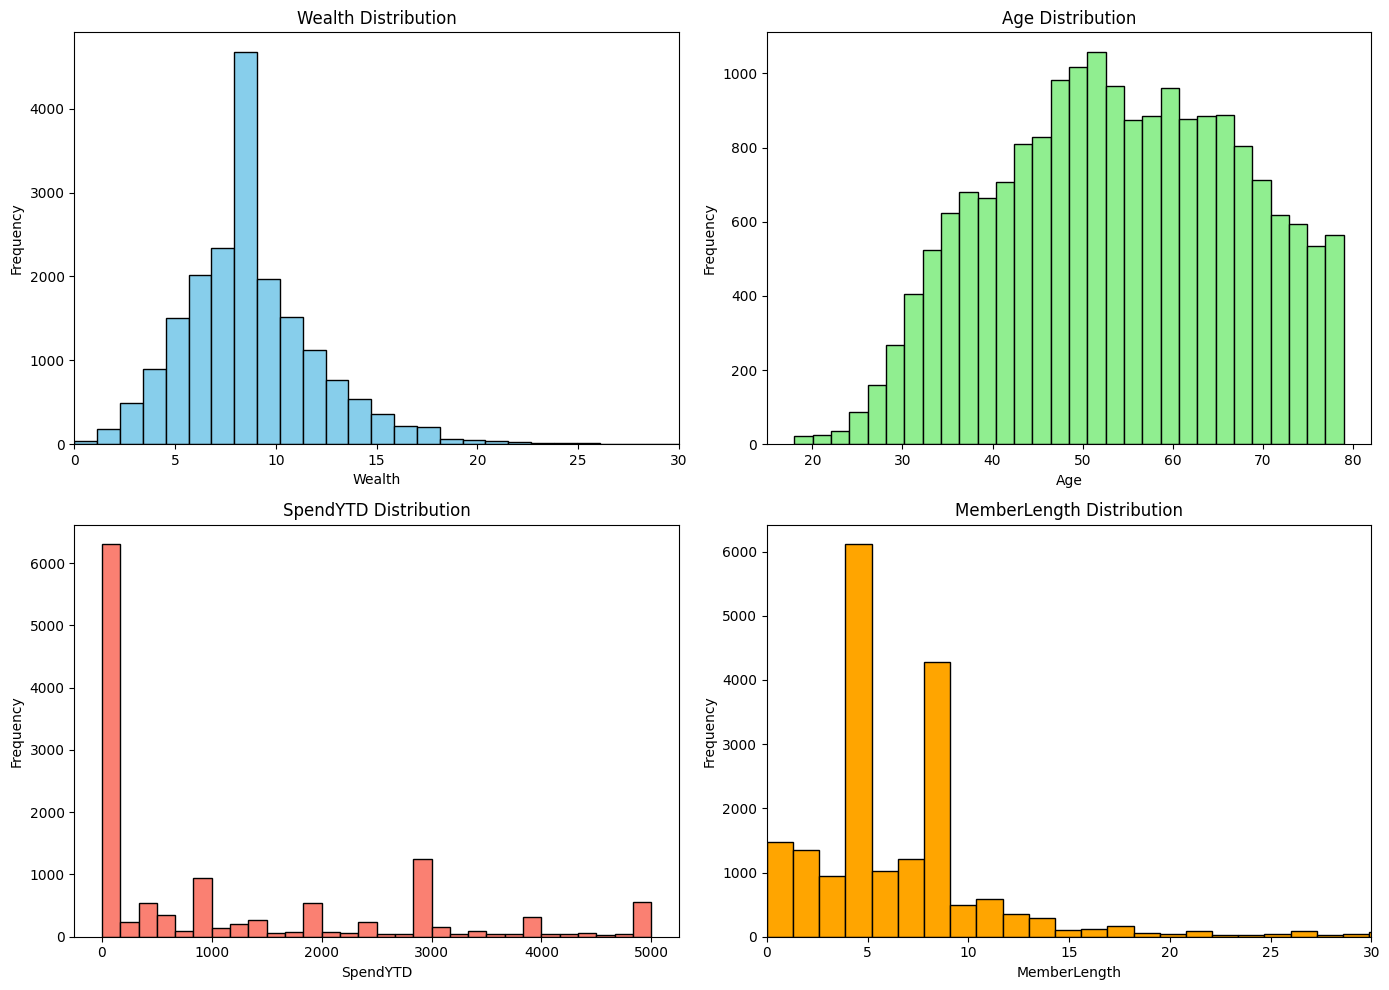

In [206]:
# Plot histograms for Wealth, Age, SpendYTD, and MemberLength
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histogram for Wealth
axes[0, 0].hist(df['Wealth'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Wealth Distribution')
axes[0, 0].set_xlabel('Wealth')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(0, 30)

# Plot histogram for Age
axes[0, 1].hist(df['Age'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for SpendYTD
# Remove SpendYTD outliers above 5000
df_ytd = df[df['SpendYTD'] <= 5000]
axes[1, 0].hist(df_ytd['SpendYTD'], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('SpendYTD Distribution')
axes[1, 0].set_xlabel('SpendYTD')
axes[1, 0].set_ylabel('Frequency')


# Plot histogram for MemberLength
axes[1, 1].hist(df['MemberLength'], bins=30, color='orange', edgecolor='black')
axes[1, 1].set_title('MemberLength Distribution')
axes[1, 1].set_xlabel('MemberLength')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, 30)

plt.tight_layout()
#plt.gca().set_aspect('auto', adjustable='box')
plt.show()

In [207]:
# Calculate the average SpendYTD for TargetBuy = 1
average_spend_target_buy_1 = df[df['TargetBuy'] == 1]['SpendYTD'].mean()

# Calculate the average SpendYTD for TargetBuy = 0
average_spend_target_buy_0 = df[df['TargetBuy'] == 0]['SpendYTD'].mean()

# Display the results
print(f"Average SpendYTD for Organic Buyers = 1: {average_spend_target_buy_1:.2f}")
print(f"Average SpendYTD for Non-Organic Buyers = 0: {average_spend_target_buy_0:.2f}")

Average SpendYTD for Organic Buyers = 1: 3350.50
Average SpendYTD for Non-Organic Buyers = 0: 4832.61


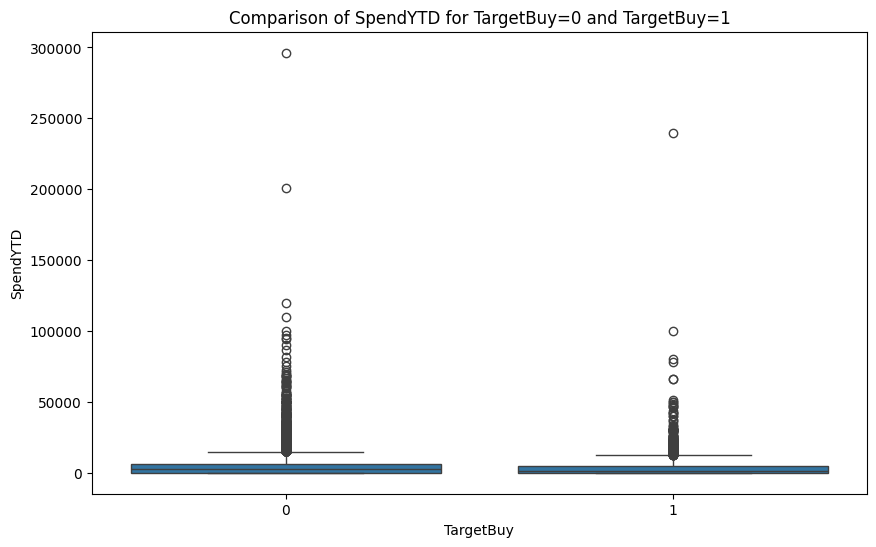

In [208]:
# Create a box plot to compare SpendYTD for TargetBuy=0 and TargetBuy=1
plt.figure(figsize=(10, 6))
sns.boxplot(x='TargetBuy', y='SpendYTD', data=df)
plt.title('Comparison of SpendYTD for TargetBuy=0 and TargetBuy=1')
plt.xlabel('TargetBuy')
plt.ylabel('SpendYTD')
plt.show()

In [209]:
# Calculate the percentage of records where TargetBuy = 1 for each Region
region_target_buy = df[df['TargetBuy'] == 1].groupby('TVRegion').size() / df.groupby('TVRegion').size() * 100

# Display the result
print(region_target_buy)

TVRegion
Border          21.590909
C Scotland      22.930801
East            26.026444
London          26.090184
Midlands        25.018129
N East          25.394548
N Scot          24.573379
N West          21.919302
S & S East      22.393642
S West          23.225806
Ulster          21.681416
Wales & West    24.800532
Yorkshire       22.770701
dtype: float64


***

## Split Data

In [210]:
# split the data into training and testing sets
X = df.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13346 entries, 22189 to 20618
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wealth                  13346 non-null  float64
 1   Age                     13346 non-null  float64
 2   SpendYTD                13346 non-null  float64
 3   MemberLength            13346 non-null  float64
 4   Gender_M                13346 non-null  float64
 5   Gender_U                13346 non-null  float64
 6   Region_North            13346 non-null  float64
 7   Region_Scottish         13346 non-null  float64
 8   Region_South East       13346 non-null  float64
 9   Region_South West       13346 non-null  float64
 10  TVRegion_C Scotland     13346 non-null  float64
 11  TVRegion_East           13346 non-null  float64
 12  TVRegion_London         13346 non-null  float64
 13  TVRegion_Midlands       13346 non-null  float64
 14  TVRegion_N East         13346 non-null 

***

## Decision Tree

In [211]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=50, ccp_alpha = 0.001, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=50,
                       random_state=42)

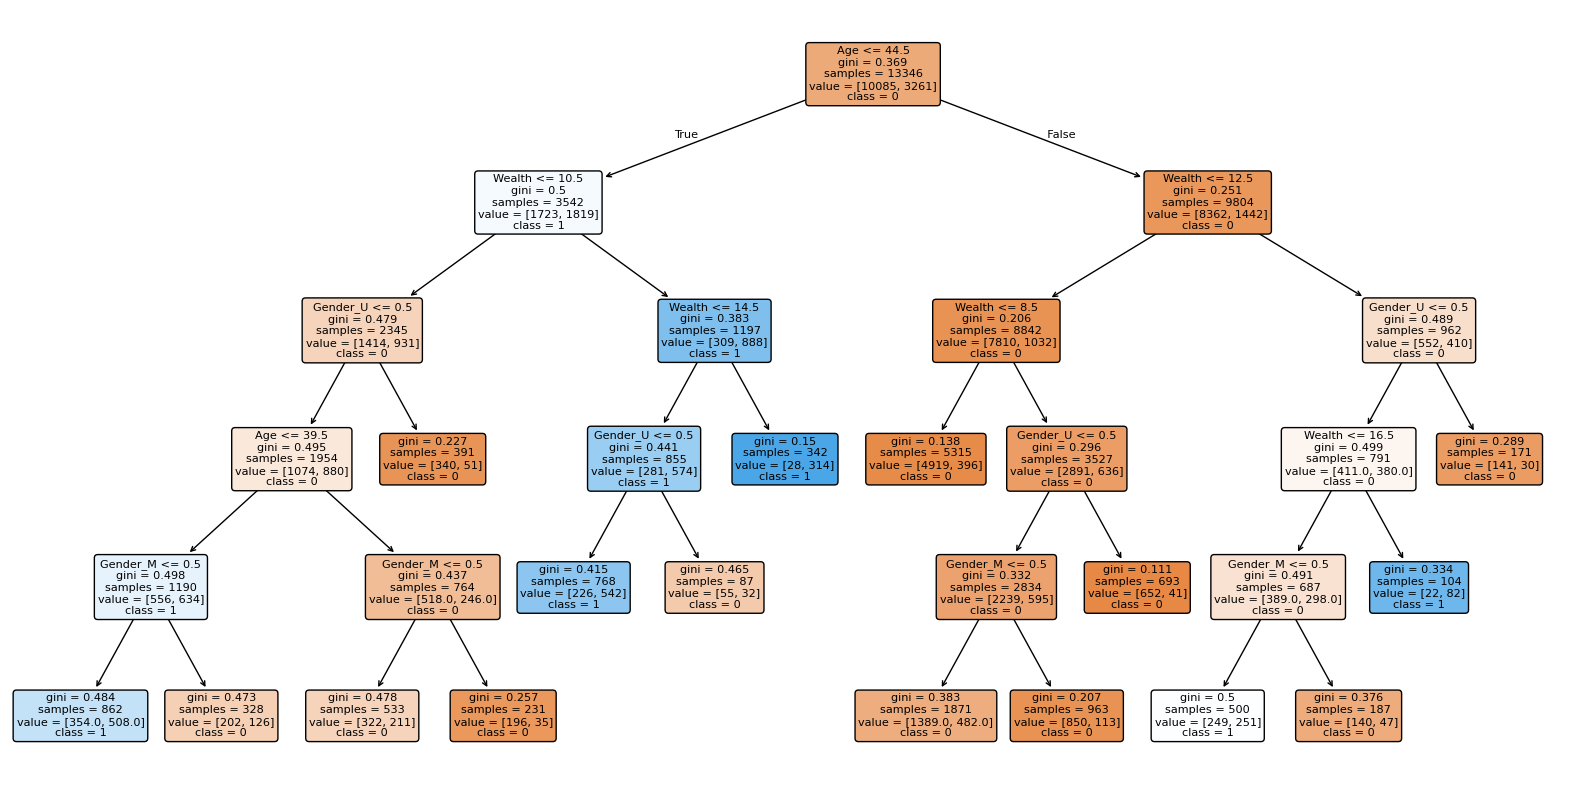

In [212]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [213]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz 
# import graphviz

# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# # visualize the decision tree
# dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")

In [214]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1 Score : {:.4f}".format(f1_train))
print("")

# calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1 Score : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.8169
Precision: 0.6588
Recall.  : 0.5204
F1 Score : 0.5815

 -- test set -- 
Accuracy : 0.8203
Precision: 0.6691
Recall.  : 0.5236
F1 Score : 0.5875


In [216]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[9206 1564]
 [ 879 1697]]
[[3960  666]
 [ 362  732]]


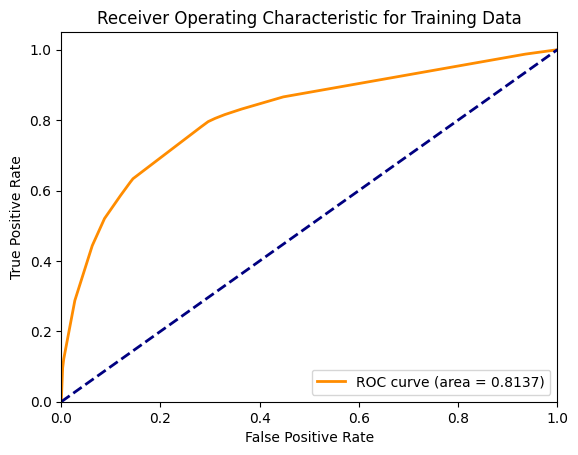

In [217]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

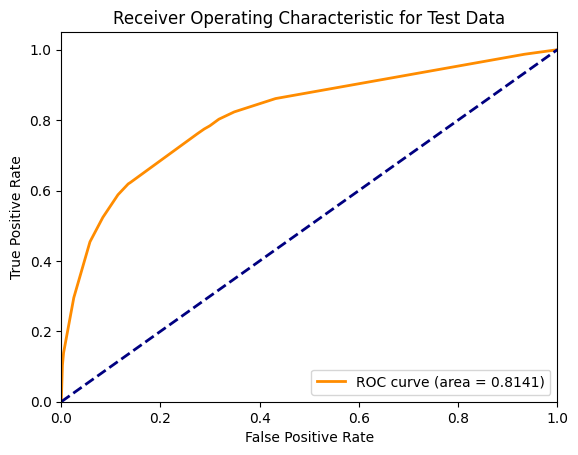

In [218]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

***

## Random Forest

In [219]:
X = df.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [220]:
# Create a default RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

# Calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
prec_train_rf = precision_score(y_train, y_pred_train_rf)
rec_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

# Print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train_rf))
print("Precision: {:.4f}".format(prec_train_rf))
print("Recall.  : {:.4f}".format(rec_train_rf))
print("F1 Score : {:.4f}".format(f1_train_rf))
print("")

# Calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
prec_test_rf = precision_score(y_test, y_pred_test_rf)
rec_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

# Print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test_rf))
print("Precision: {:.4f}".format(prec_test_rf))
print("Recall.  : {:.4f}".format(rec_test_rf))
print("F1 Score : {:.4f}".format(f1_test_rf))

 -- train set -- 
Accuracy : 0.9938
Precision: 0.9913
Recall.  : 0.9831
F1 Score : 0.9872

 -- test set -- 
Accuracy : 0.8033
Precision: 0.6366
Recall.  : 0.4549
F1 Score : 0.5307


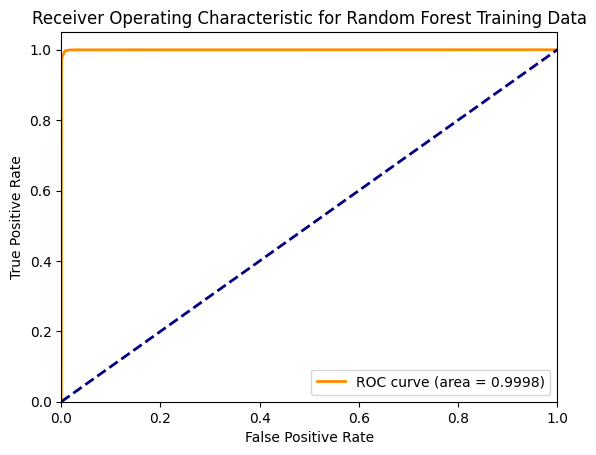

In [221]:
# Generate ROC curve for Random Forest training data
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train.cat.codes, y_prob_train_rf[:, 1])
roc_auc_train_rf = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_train_rf, tpr_train_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Training Data')
plt.legend(loc='lower right')
plt.show()

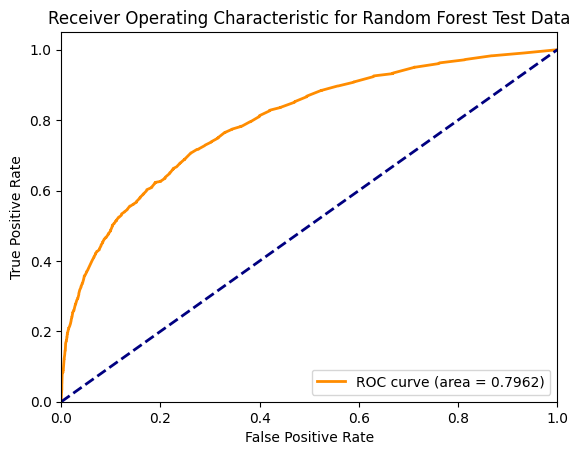

In [222]:
# Generate ROC curve for Random Forest test data
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test.cat.codes, y_prob_test_rf[:, 1])
roc_auc_test_rf = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_test_rf, tpr_test_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Test Data')
plt.legend(loc='lower right')
plt.show()

***

## Tuned Random Forest

In [223]:
X = df.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [224]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [225]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [226]:
#rf_random.best_params_

In [227]:
# Create a default RandomForestClassifier
#rf = RandomForestClassifier(bootstrap= True, max_depth= 5, min_samples_leaf= 6, min_samples_split= 15, n_estimators= 50, random_state=42)
rf = RandomForestClassifier(bootstrap= True, max_features='sqrt', max_depth= 20, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 30, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

# Calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
prec_train_rf = precision_score(y_train, y_pred_train_rf)
rec_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

# Print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train_rf))
print("Precision: {:.4f}".format(prec_train_rf))
print("Recall.  : {:.4f}".format(rec_train_rf))
print("F1 Score : {:.4f}".format(f1_train_rf))
print("")

# Calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
prec_test_rf = precision_score(y_test, y_pred_test_rf)
rec_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

# Print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test_rf))
print("Precision: {:.4f}".format(prec_test_rf))
print("Recall.  : {:.4f}".format(rec_test_rf))
print("F1 Score : {:.4f}".format(f1_test_rf))

 -- train set -- 
Accuracy : 0.8543
Precision: 0.8143
Recall.  : 0.5232
F1 Score : 0.6370

 -- test set -- 
Accuracy : 0.8191
Precision: 0.7023
Recall.  : 0.4506
F1 Score : 0.5490


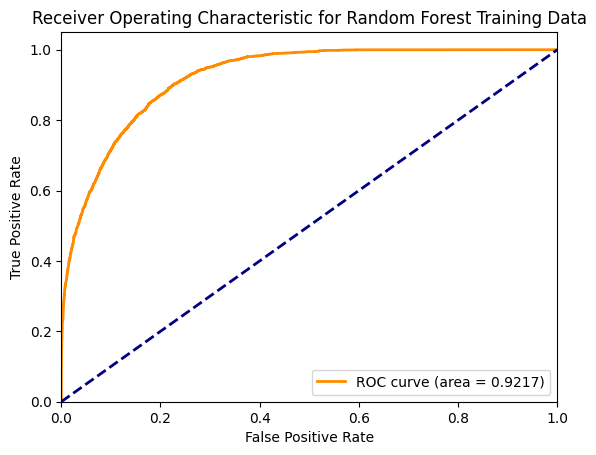

In [228]:
# Generate ROC curve for Random Forest training data
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train.cat.codes, y_prob_train_rf[:, 1])
roc_auc_train_rf = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_train_rf, tpr_train_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Training Data')
plt.legend(loc='lower right')
plt.show()

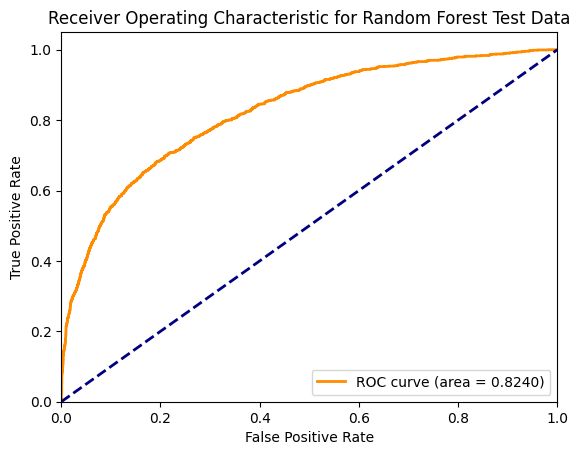

In [229]:
# Generate ROC curve for Random Forest test data
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test.cat.codes, y_prob_test_rf[:, 1])
roc_auc_test_rf = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_test_rf, tpr_test_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Test Data')
plt.legend(loc='lower right')
plt.show()

In [230]:
# Print details of the RandomForestClassifier
print(rf)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=30, random_state=42)


In [231]:
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                   Feature  Importance
1                      Age    0.381905
0                   Wealth    0.278690
2                 SpendYTD    0.075408
5                 Gender_U    0.072702
3             MemberLength    0.070117
4                 Gender_M    0.036065
24       LoyaltyStatus_Tin    0.009859
23    LoyaltyStatus_Silver    0.008864
12         TVRegion_London    0.008519
13       TVRegion_Midlands    0.007296
8        Region_South East    0.007050
6             Region_North    0.006170
20   TVRegion_Wales & West    0.005294
16         TVRegion_N West    0.004884
17     TVRegion_S & S East    0.004694
11           TVRegion_East    0.004647
21      TVRegion_Yorkshire    0.003681
7          Region_Scottish    0.002866
14         TVRegion_N East    0.002450
22  LoyaltyStatus_Platinum    0.002000
10     TVRegion_C Scotland    0.001929
9        Region_South West    0.001584
18         TVRegion_S West    0.001510
15         TVRegion_N Scot    0.001144
19         TVRegion_Ulste

***

## Logistic Regression

In [232]:
X = df.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [233]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train_log_reg = log_reg.predict(X_train)
y_pred_test_log_reg = log_reg.predict(X_test)

# Calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
prec_train_log_reg = precision_score(y_train, y_pred_train_log_reg)
rec_train_log_reg = recall_score(y_train, y_pred_train_log_reg)
f1_train_log_reg = f1_score(y_train, y_pred_train_log_reg)

# Print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train_log_reg))
print("Precision: {:.4f}".format(prec_train_log_reg))
print("Recall.  : {:.4f}".format(rec_train_log_reg))
print("F1 Score : {:.4f}".format(f1_train_log_reg))
print("")

# Calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test_log_reg = accuracy_score(y_test, y_pred_test_log_reg)
prec_test_log_reg = precision_score(y_test, y_pred_test_log_reg)
rec_test_log_reg = recall_score(y_test, y_pred_test_log_reg)
f1_test_log_reg = f1_score(y_test, y_pred_test_log_reg)

# Print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test_log_reg))
print("Precision: {:.4f}".format(prec_test_log_reg))
print("Recall.  : {:.4f}".format(rec_test_log_reg))
print("F1 Score : {:.4f}".format(f1_test_log_reg))

 -- train set -- 
Accuracy : 0.8144
Precision: 0.7063
Recall.  : 0.4115
F1 Score : 0.5201

 -- test set -- 
Accuracy : 0.8168
Precision: 0.7171
Recall.  : 0.4134
F1 Score : 0.5245


                 Feature  Importance
1                    Age    0.381905
0                 Wealth    0.278690
2               SpendYTD    0.075408
5               Gender_U    0.072702
3           MemberLength    0.070117
4               Gender_M    0.036065
24     LoyaltyStatus_Tin    0.009859
23  LoyaltyStatus_Silver    0.008864
12       TVRegion_London    0.008519
13     TVRegion_Midlands    0.007296


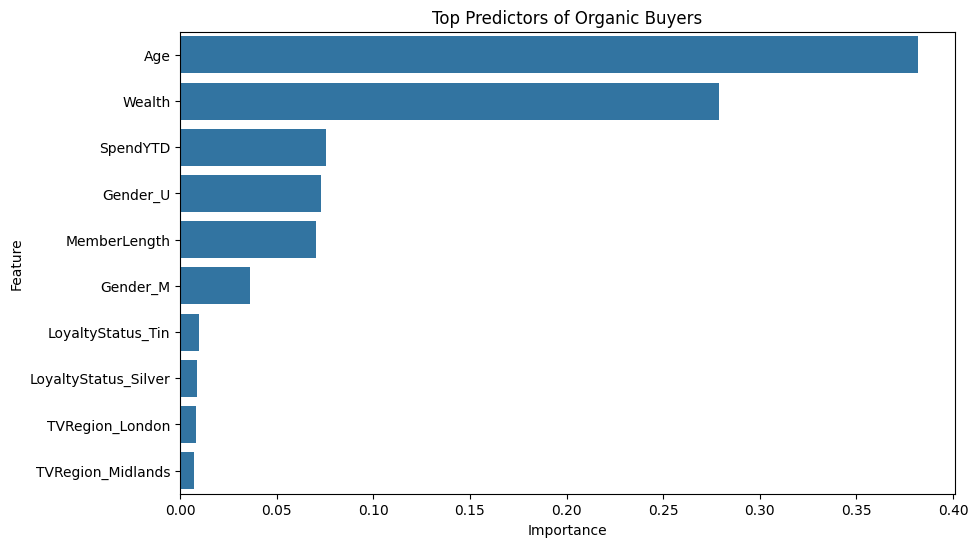

In [234]:
# Display the top predictors
top_predictors = feature_importances.head(10)
#top_predictors = top_predictors[~top_predictors['Feature'].str.contains('Gender')]
top_predictors.rename(columns={'Gender_M':'Gender'}, inplace=True)
print(top_predictors)

# Plot the top predictors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_predictors)
plt.title('Top Predictors of Organic Buyers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

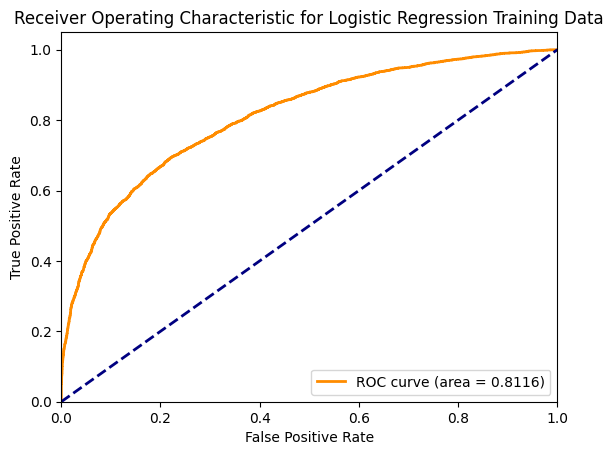

In [235]:
# Generate ROC curve for Logistic Regression training data
fpr_train_log_reg, tpr_train_log_reg, thresholds_train_log_reg = roc_curve(y_train.cat.codes, log_reg.predict_proba(X_train)[:, 1])
roc_auc_train_log_reg = roc_auc_score(y_train.cat.codes, log_reg.predict_proba(X_train)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_train_log_reg, tpr_train_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression Training Data')
plt.legend(loc='lower right')
plt.show()

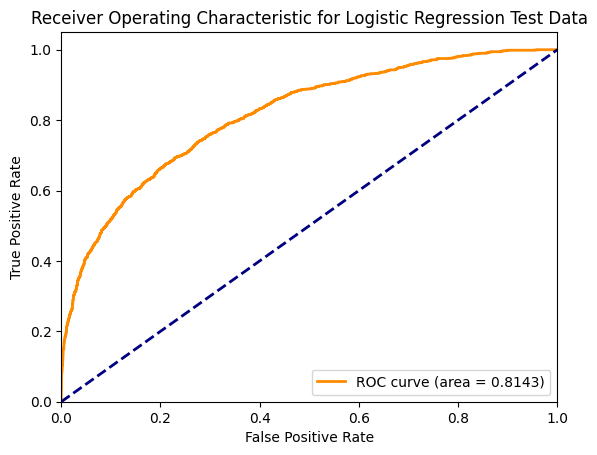

In [236]:
# Generate ROC curve for Logistic Regression test data
fpr_test_log_reg, tpr_test_log_reg, thresholds_test_log_reg = roc_curve(y_test.cat.codes, log_reg.predict_proba(X_test)[:, 1])
roc_auc_test_log_reg = roc_auc_score(y_test.cat.codes, log_reg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_test_log_reg, tpr_test_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression Test Data')
plt.legend(loc='lower right')
plt.show()

***

## Decision Tree - Known Gender

In [237]:
dfg = df.copy()
dfg = dfg[dfg['Gender'] != 'U']
dfg

,Wealth,Age,Gender,Region,TVRegion,LoyaltyStatus,SpendYTD,MemberLength,TargetBuy
2,5.0,70.0,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,F,Midlands,Midlands,Tin,0.01,8.0,0
6,11.0,74.0,F,Midlands,East,Tin,0.01,8.0,0
7,13.0,62.0,M,North,N East,Tin,0.01,5.0,0
...,...,...,...,...,...,...,...,...,...
22213,14.0,43.0,M,Midlands,Midlands,Silver,3336.92,2.0,1
22216,13.0,49.0,M,South East,London,Silver,500.00,9.0,0
22218,13.0,65.0,F,South East,London,Silver,1500.00,5.0,0
22220,9.0,70.0,F,North,Yorkshire,Gold,6000.00,5.0,0


In [238]:
X = dfg.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = dfg['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [239]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=50, ccp_alpha = 0.001, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=50,
                       random_state=42)

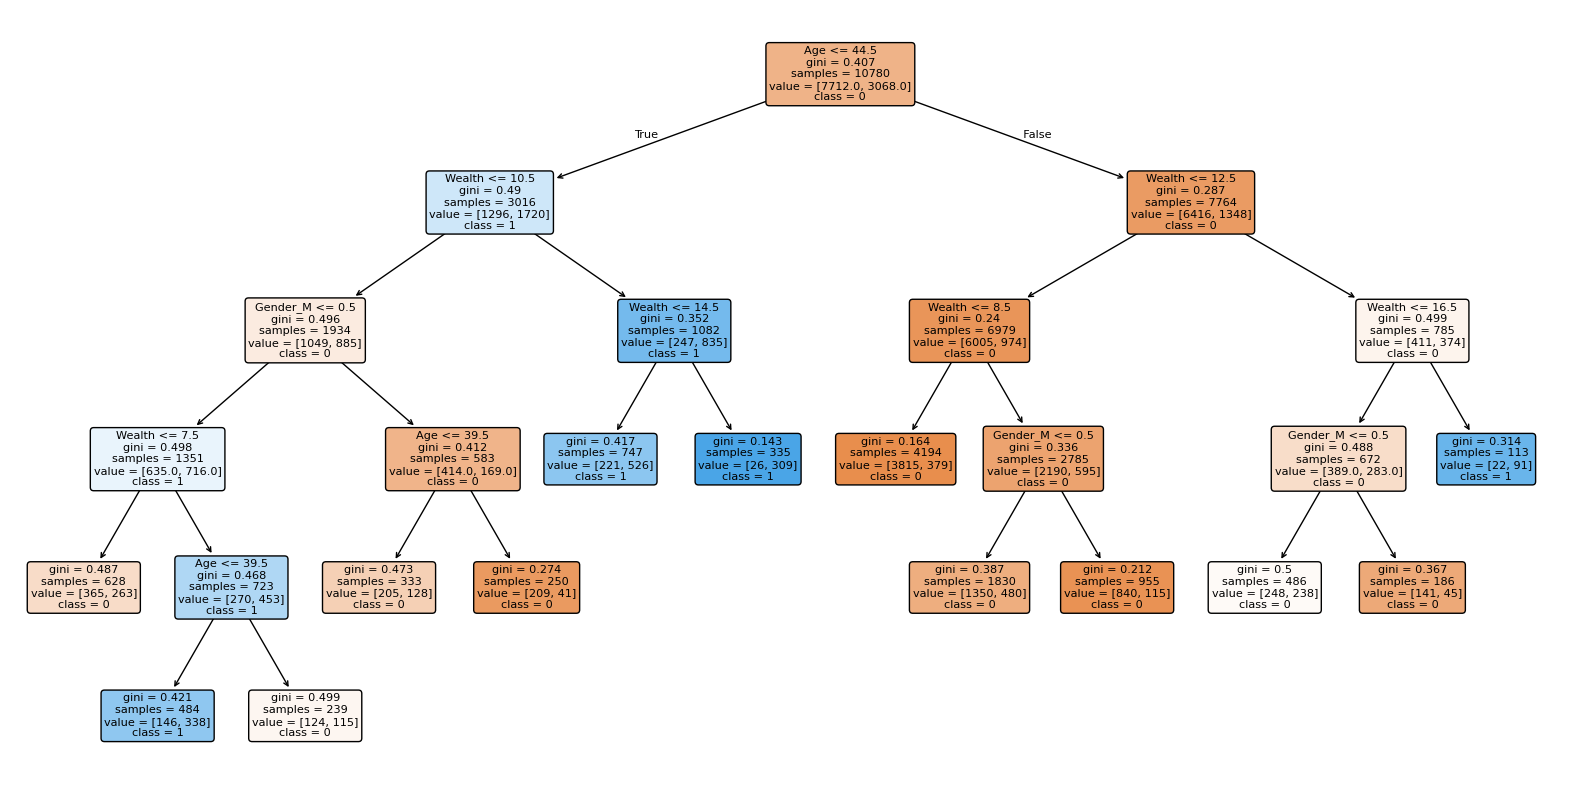

In [240]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [241]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
import graphviz

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [242]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [243]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1 Score : {:.4f}".format(f1_train))
print("")

# calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1 Score : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.7942
Precision: 0.7528
Recall.  : 0.4120
F1 Score : 0.5325

 -- test set -- 
Accuracy : 0.7923
Precision: 0.7511
Recall.  : 0.4038
F1 Score : 0.5252


In [244]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[7297 1804]
 [ 415 1264]]
[[3130  784]
 [ 176  531]]


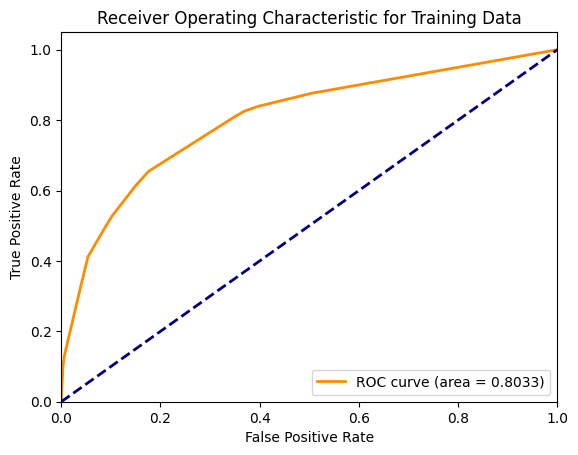

In [245]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

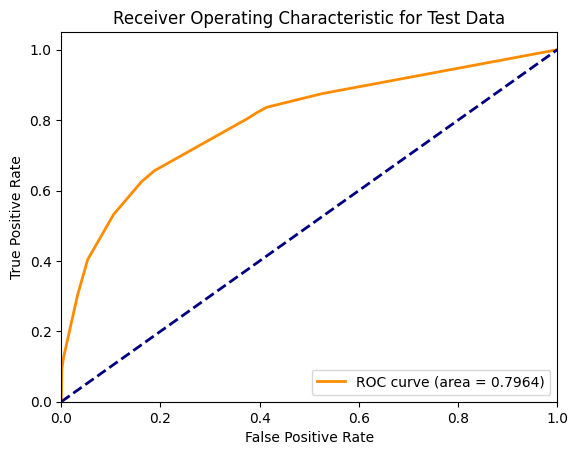

In [246]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

***

## Tuned Random Forest - Known Gender

In [247]:
dfg = df.copy()
dfg = dfg[dfg['Gender'] != 'U']
dfg

,Wealth,Age,Gender,Region,TVRegion,LoyaltyStatus,SpendYTD,MemberLength,TargetBuy
2,5.0,70.0,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,F,Midlands,Midlands,Tin,0.01,8.0,0
6,11.0,74.0,F,Midlands,East,Tin,0.01,8.0,0
7,13.0,62.0,M,North,N East,Tin,0.01,5.0,0
...,...,...,...,...,...,...,...,...,...
22213,14.0,43.0,M,Midlands,Midlands,Silver,3336.92,2.0,1
22216,13.0,49.0,M,South East,London,Silver,500.00,9.0,0
22218,13.0,65.0,F,South East,London,Silver,1500.00,5.0,0
22220,9.0,70.0,F,North,Yorkshire,Gold,6000.00,5.0,0


In [248]:
X = dfg.drop(['TargetBuy'], axis=1)
X = pd.get_dummies(X, columns=['Gender','Region','TVRegion','LoyaltyStatus'], drop_first=True, dtype='float')

y = dfg['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [249]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [250]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [251]:
#rf_random.best_params_

In [252]:
# Create a default RandomForestClassifier
#rf = RandomForestClassifier(bootstrap= True, max_depth= 5, min_samples_leaf= 6, min_samples_split= 15, n_estimators= 50, random_state=42)
rf = RandomForestClassifier(bootstrap= True, max_features='sqrt', max_depth= 20, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 30, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

# Calculate the accuracy, precision, recall, and f1 scores for the training set
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
prec_train_rf = precision_score(y_train, y_pred_train_rf)
rec_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

# Print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train_rf))
print("Precision: {:.4f}".format(prec_train_rf))
print("Recall.  : {:.4f}".format(rec_train_rf))
print("F1 Score : {:.4f}".format(f1_train_rf))
print("")

# Calculate the accuracy, precision, recall, and f1 scores for the test set
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
prec_test_rf = precision_score(y_test, y_pred_test_rf)
rec_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

# Print the scores for the test set
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test_rf))
print("Precision: {:.4f}".format(prec_test_rf))
print("Recall.  : {:.4f}".format(rec_test_rf))
print("F1 Score : {:.4f}".format(f1_test_rf))

 -- train set -- 
Accuracy : 0.8346
Precision: 0.8061
Recall.  : 0.5515
F1 Score : 0.6549

 -- test set -- 
Accuracy : 0.7912
Precision: 0.7021
Recall.  : 0.4624
F1 Score : 0.5575


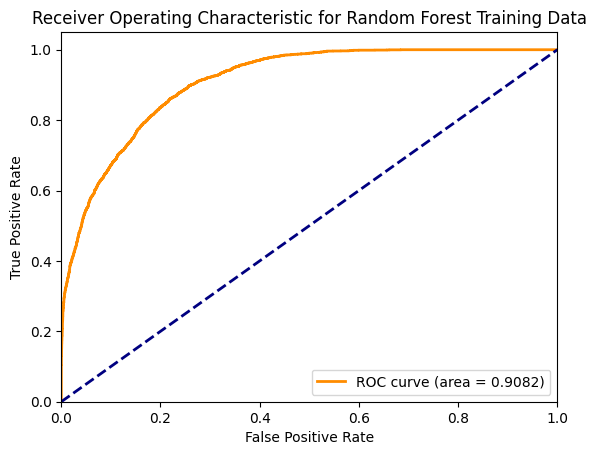

In [253]:
# Generate ROC curve for Random Forest training data
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train.cat.codes, y_prob_train_rf[:, 1])
roc_auc_train_rf = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_train_rf, tpr_train_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Training Data')
plt.legend(loc='lower right')
plt.show()

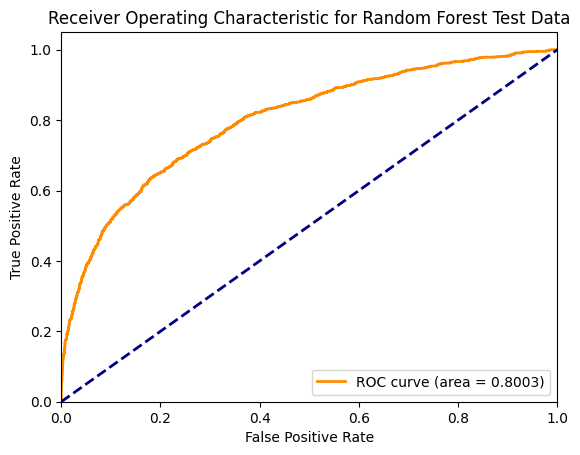

In [254]:
# Generate ROC curve for Random Forest test data
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test.cat.codes, y_prob_test_rf[:, 1])
roc_auc_test_rf = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr_test_rf, tpr_test_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Test Data')
plt.legend(loc='lower right')
plt.show()

                 Feature  Importance
1                    Age    0.385884
0                 Wealth    0.310117
2               SpendYTD    0.081746
3           MemberLength    0.074951
23     LoyaltyStatus_Tin    0.012016
22  LoyaltyStatus_Silver    0.008385
12     TVRegion_Midlands    0.006298
11       TVRegion_London    0.005771
7      Region_South East    0.005462


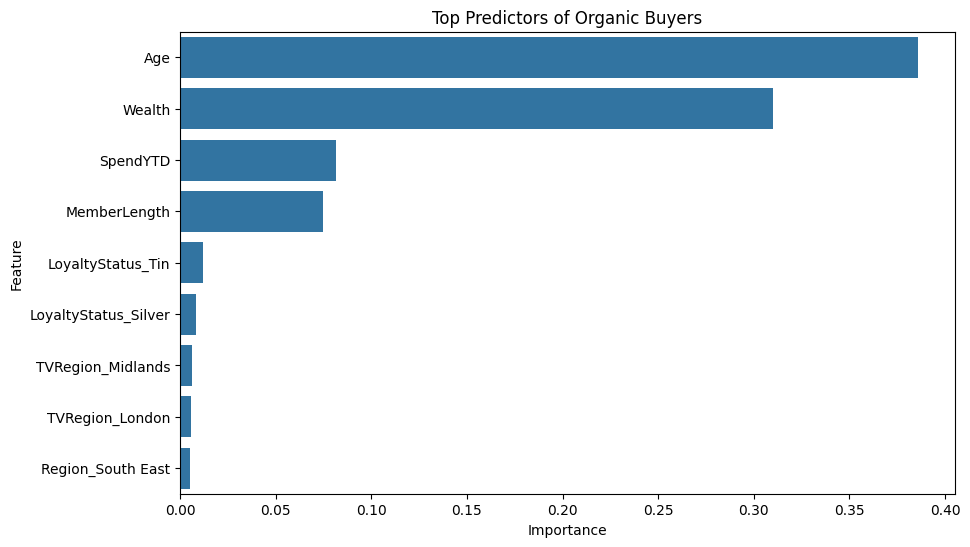

In [258]:
# Display the top predictors
top_predictors = feature_importances.head(10)
top_predictors = top_predictors[~top_predictors['Feature'].str.contains('Gender')]
print(top_predictors)

# Plot the top predictors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_predictors)
plt.title('Top Predictors of Organic Buyers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [256]:
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                   Feature  Importance
1                      Age    0.385884
0                   Wealth    0.310117
2                 SpendYTD    0.081746
3             MemberLength    0.074951
4                 Gender_M    0.064232
23       LoyaltyStatus_Tin    0.012016
22    LoyaltyStatus_Silver    0.008385
12       TVRegion_Midlands    0.006298
11         TVRegion_London    0.005771
7        Region_South East    0.005462
15         TVRegion_N West    0.005346
5             Region_North    0.005321
19   TVRegion_Wales & West    0.004805
10           TVRegion_East    0.004311
16     TVRegion_S & S East    0.004264
20      TVRegion_Yorkshire    0.004253
21  LoyaltyStatus_Platinum    0.003198
6          Region_Scottish    0.003070
13         TVRegion_N East    0.003044
9      TVRegion_C Scotland    0.002015
8        Region_South West    0.001880
14         TVRegion_N Scot    0.001517
17         TVRegion_S West    0.001366
18         TVRegion_Ulster    0.000750


<Figure size 800x500 with 0 Axes>

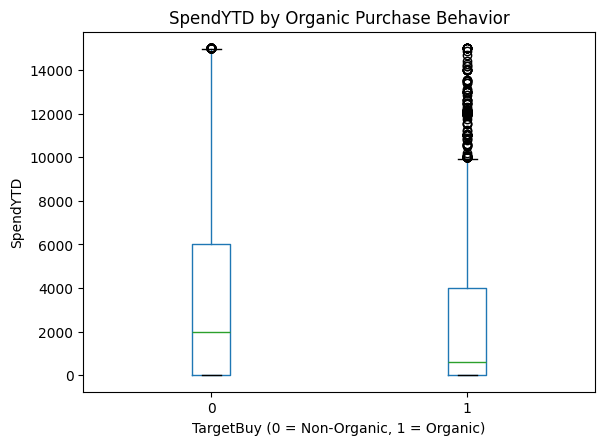

                Group  Mean SpendYTD  Median SpendYTD  Total SpendYTD
0      Organic Buyers    2439.794293            600.0     10935158.02
1  Non-Organic Buyers    3267.351226           2000.0     43805377.89
T-test: t-statistic = -13.31, p-value = 0.0000


In [257]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Remove SpendYTD outliers above 15000
df5 = df[df['SpendYTD'] <= 15000]

# Separate groups
organic_buyers = df5[df5['TargetBuy'] == 1]
non_organic_buyers = df5[df5['TargetBuy'] == 0]

# Compute summary statistics
summary_stats = {
    'Group': ['Organic Buyers', 'Non-Organic Buyers'],
    'Mean SpendYTD': [organic_buyers['SpendYTD'].mean(), non_organic_buyers['SpendYTD'].mean()],
    'Median SpendYTD': [organic_buyers['SpendYTD'].median(), non_organic_buyers['SpendYTD'].median()],
    'Total SpendYTD': [organic_buyers['SpendYTD'].sum(), non_organic_buyers['SpendYTD'].sum()],
}
summary_df = pd.DataFrame(summary_stats)

# Perform a t-test
t_stat, p_value = ttest_ind(organic_buyers['SpendYTD'], non_organic_buyers['SpendYTD'])

# Visualize data
plt.figure(figsize=(8, 5))
df5.boxplot(column='SpendYTD', by='TargetBuy', grid=False)
plt.title('SpendYTD by Organic Purchase Behavior')
plt.suptitle('')
plt.xlabel('TargetBuy (0 = Non-Organic, 1 = Organic)')
plt.ylabel('SpendYTD')
plt.show()

# Display results
print(summary_df)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
